NB: Puisque les données ont été créées de manière random, elles ne sont pas réellement reprensatatives de la réalité et donc les graphiques aussi.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/Prediction.csv")
data.head()

,cart_type,entreprise_email,entreprise_name,entreprise_city,day_publication,month_publication,hour_publication,quantity_published,quantity_reserved,quantity_take
0,frais,entreprise14@example.com,Carrefour,Nice,4,6,0,59,59,59
1,sec,entreprise13@example.com,Monoprix,Lyon,3,9,0,111,110,105
2,frais,entreprise7@example.com,Carrefour,Toulouse,4,3,0,194,155,155
3,frais,entreprise3@example.com,Auchan,Marseille,6,12,0,350,344,336
4,mixte,entreprise14@example.com,Carrefour,Nice,1,2,0,96,26,26


In [3]:
data[['quantity_published', 'quantity_reserved', 'quantity_take']].describe()

,quantity_published,quantity_reserved,quantity_take
count,1000.000000,1000.00000,1000.00000
mean,248.107000,199.63400,192.47600
std,144.725198,141.68764,142.19539
min,11.000000,0.00000,0.00000
25%,118.000000,73.00000,66.00000
50%,242.500000,179.00000,168.50000
75%,377.000000,316.25000,310.00000
max,499.000000,499.00000,499.00000


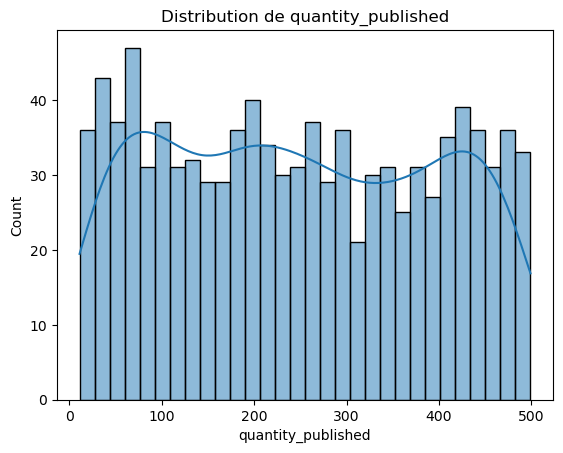

In [4]:
sns.histplot(data['quantity_published'], bins=30, kde=True)
plt.title("Distribution de quantity_published")
plt.show()

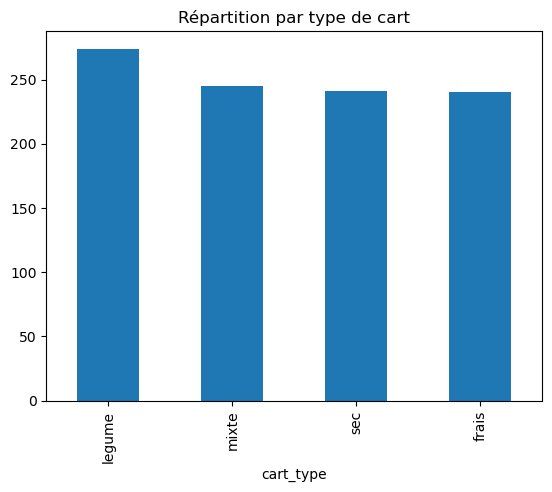

In [5]:
data['cart_type'].value_counts().plot(kind='bar')
plt.title("Répartition par type de cart")
plt.show()

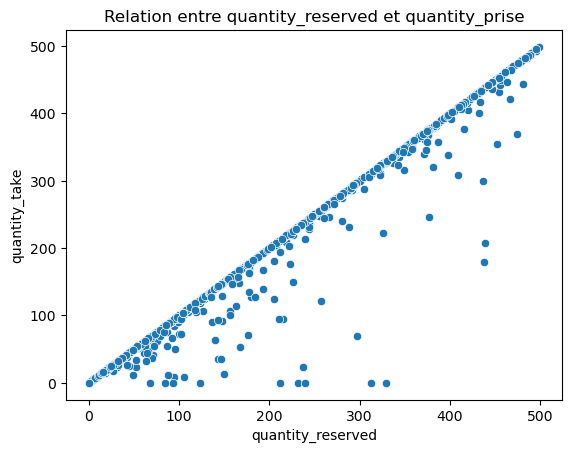

In [13]:
sns.scatterplot(x=data['quantity_reserved'], y=data['quantity_take'])
plt.title("Relation entre quantity_reserved et quantity_prise")
plt.show()

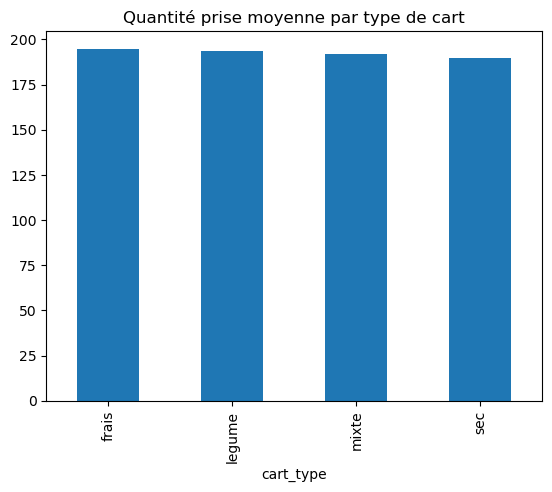

In [14]:
avg_reserved_by_type = data.groupby('cart_type')['quantity_take'].mean()
avg_reserved_by_type.plot(kind='bar')
plt.title("Quantité prise moyenne par type de cart")
plt.show()

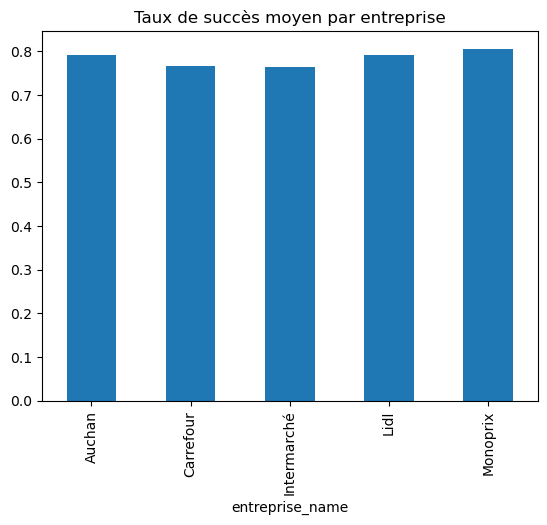

In [15]:
data['success_rate'] = data['quantity_take'] / data['quantity_published']
success_by_company = data.groupby('entreprise_name')['success_rate'].mean()
success_by_company.plot(kind='bar')
plt.title("Taux de succès moyen par entreprise")
plt.show()

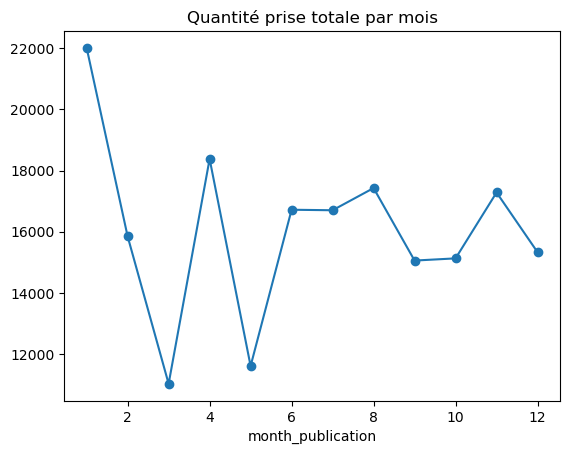

In [16]:
monthly_reservations = data.groupby('month_publication')['quantity_take'].sum()
monthly_reservations.plot(kind='line', marker='o')
plt.title("Quantité prise totale par mois")
plt.show()